# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.

In [2]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read airbnb data from csv file
df = pd.read_csv('./data/airbnb_hw.csv',low_memory=False)

In [4]:
## clean Price variable
# remove commas from values >= 1000
df['Price'] = df['Price'].str.replace(',','')

# type cast strings to numeric 
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [5]:
print('Dimensions are',df.shape)
print('There are',len(df),'observations')
print('Variables included are', df.columns)
df.head()

Dimensions are (30478, 13)
There are 30478 observations
Variables included are Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


 3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [6]:
# cross tab room type and property type
pd.crosstab(df['Room Type'],df['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


> The vast majority of listings are apartments and then houses, followed by lofts. More private rooms take the form of apartments due to the shear number of listings in the category, but by percentage, houses have the most private room options. Houses, B&Bs, Dorms, Huts, and 'Other' offer more private rooms than the entire property. A significant number of the property types are mor enovel, such as castles, chalets, lighthoues, huts, and cabins.

 4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.

<Axes: xlabel='Price', ylabel='Count'>

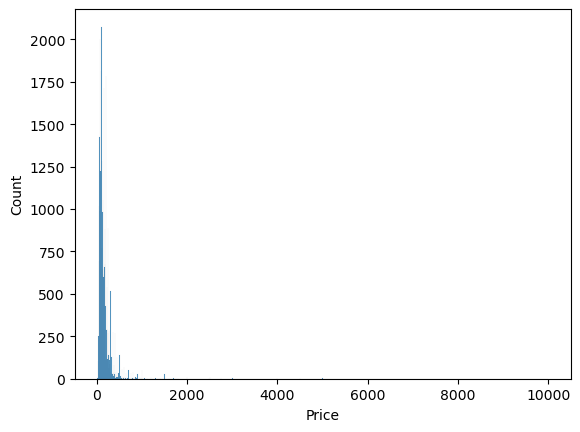

In [7]:
# plots of Price variable, unscaled
var = df['Price']
sns.histplot(data=df,x=var)

<Axes: xlabel='Price', ylabel='Density'>

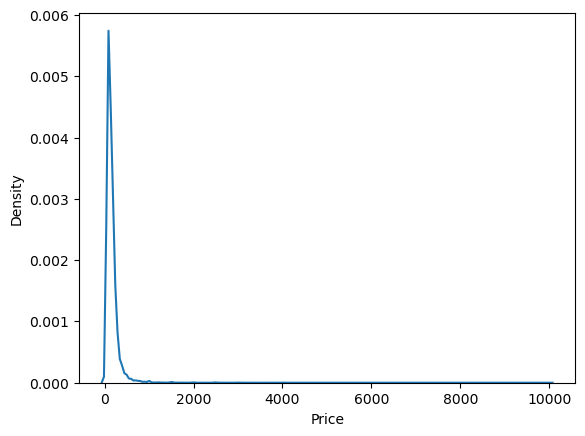

In [8]:
sns.kdeplot(data=df,x=var)

<Axes: xlabel='Price'>

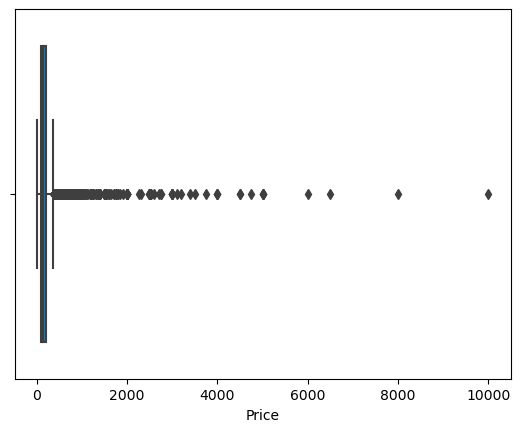

In [9]:
sns.boxplot(data=df,x=var)

In [10]:
var.describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

<Axes: xlabel='price_log', ylabel='Count'>

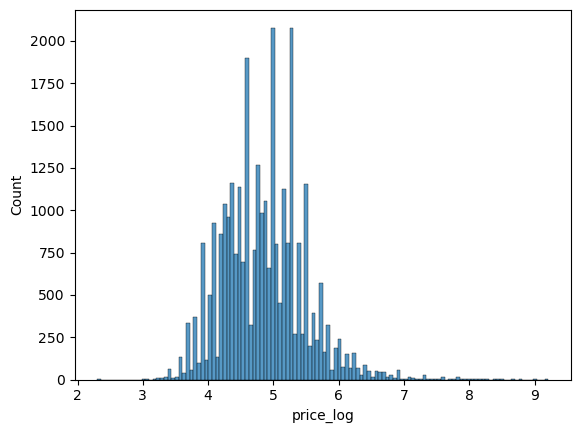

In [11]:
# plots of Price variable, scaled with log
df['price_log'] = np.log(var)
varlog = df['price_log']
sns.histplot(data=df,x=varlog)

<Axes: xlabel='price_log', ylabel='Density'>

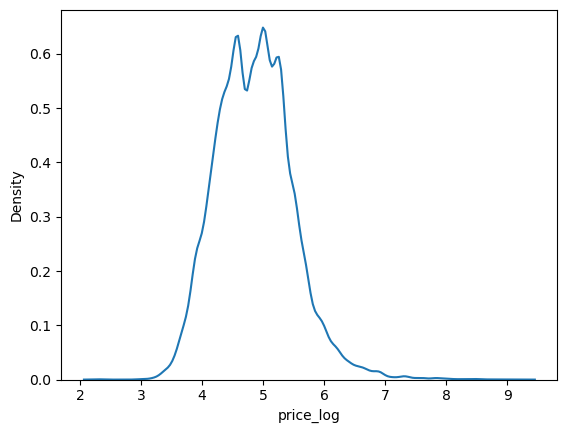

In [12]:
sns.kdeplot(data=df,x=varlog)

<Axes: xlabel='price_log'>

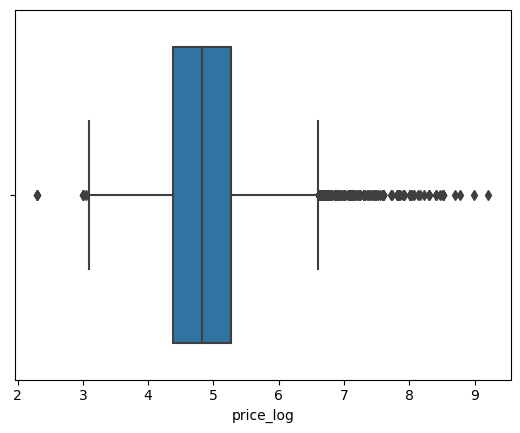

In [13]:
sns.boxplot(data=df,x=varlog)

In [14]:
varlog.describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64

5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

<Axes: xlabel='price_log', ylabel='Beds'>

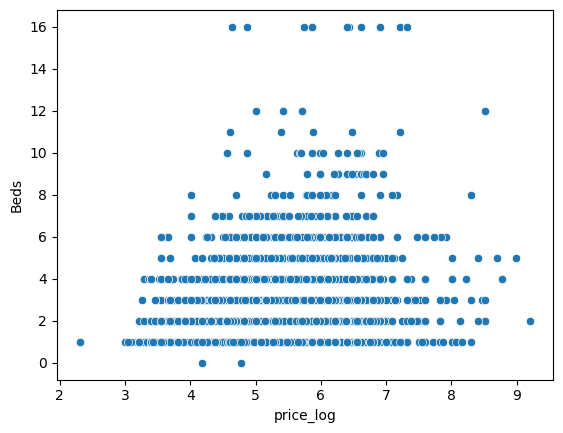

In [15]:
sns.scatterplot(data=df,x=varlog,y=df['Beds'])

In [16]:
df.loc[:,['Price','Beds']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

> in general, the average price increases as the number of beds increase. This trend starts to break down around 10 beds, which is likely due the smaller sample sizes with properties with that many beds. The standard deviation has less of an obvious trend, but increases towards 6 beds and then drops down at 7 and increasaes again. 

 6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

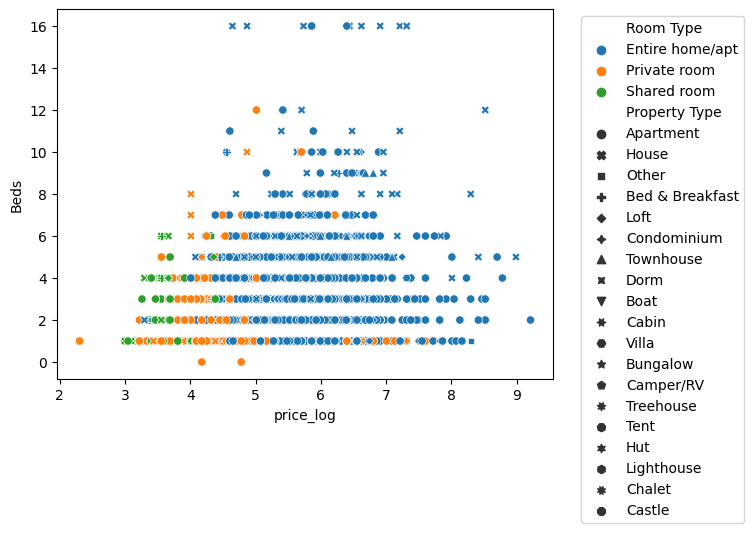

In [110]:
# not really sure how to also color this by property type?
this_plot = sns.scatterplot(data=df,x=varlog,y=df['Beds'],hue='Room Type', style='Property Type')
sns.move_legend(this_plot, "upper right", bbox_to_anchor=(1.4, 1)) # Moves the Legend

In [18]:
df.loc[:,['Price','Room Type']].groupby('Room Type').describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

<Axes: xlabel='Price', ylabel='Room Type'>

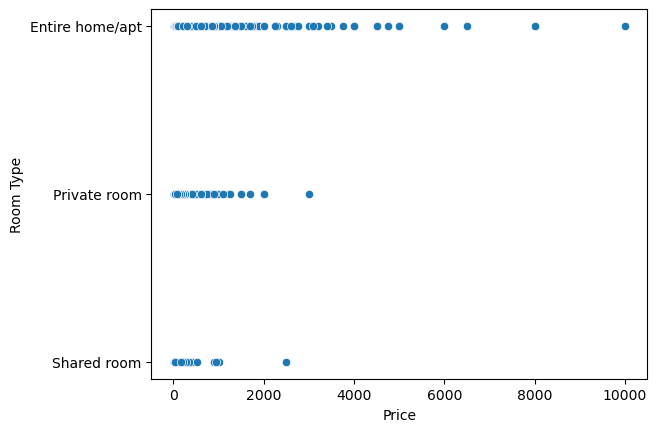

In [24]:
sns.scatterplot(data=df,x='Price',y='Room Type')

In [19]:
df.loc[:,['Price','Property Type']].groupby('Property Type').describe()

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               753.0  221.960159  271.958145   30.0   80.00  140.0   
Other               47.0  394.659574  696.663423   39.0   82.50  135.0   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          136.0  203.933824  264.178901   45.0   89.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                8.0  328.000000  479.888975   60.0  107.50  187.5   

                                  
                    75%      max  
Property Type                     
Apartment        195.00  10000.0  
Bed & Breakfast  125.00    900.0  
Boat             178.50    250.0  
Bungalow         177.75    195.0  
Cabin            207.50    250.0  
Camper/RV        109.00    325.0  
Castle           150.00    150.0  
Chalet            99.00     99.0  
Condominium      298.75   1990.0  
Dorm              80.00    200.0  
House            150.00   8000.0  
Hut               87.50    100.0  
Lighthouse        39.00     39.0  
Loft             240.00   3000.0  
Other            378.00   4000.0  
Tent             175.00    250.0  
Townhouse        206.25   2500.0  
Treehouse        156.00    300.0  
Villa            224.75   1500.0

<Axes: xlabel='Price', ylabel='Property Type'>

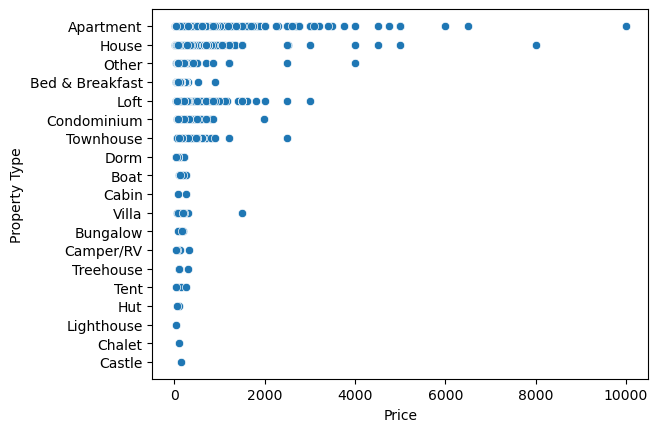

In [23]:
sns.scatterplot(data=df,x='Price',y='Property Type')

> Increasing the number of beds really only increases the minimum price of the properties. The variation in prices generally narrows as the number of beds increases. Private properties are more expensive than rooms, which are more expensive than shared rooms. On average, homes are the most expensive and have the highest standard deviation, while Villas and conomimiums are the most expensive type of properties. "Other" properties are really the most expensive and have the highest standard deviation, which makes sense since the property type does not fit in a category (either very expensive or very cheap). The mean seems to be more representative of all the property listings avaliable, however the median is more representative of the most common prices for each property/room type. For most cases then, the median would be a more representative metric.

  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

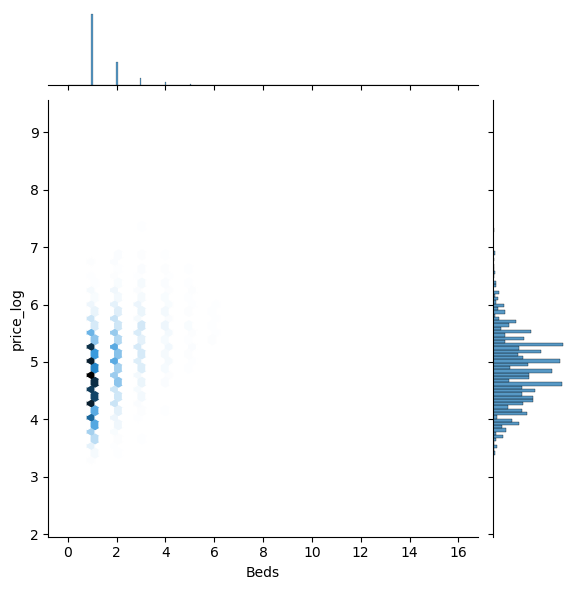

In [32]:
sns.jointplot(data=df,x='Beds',y='price_log',kind='hex')

> Most of the property listings offer between 1-2 beds, with some offering 3-4 and and fewer going up to 6 beds. The amount of listings greater than 6 beds is very small compared to the number of listings at or below 6 beds. Most of the pricing is also between a log price of 3-6. The plots in parts 5 and 6 make the variation of data look much greater than it really is. This is because scatterplots cannot show density of points very well, especially if there are multiple data points at the same values. In reality, there are not many offerings that are signficantly more expensive than the mean and median.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data

In [38]:
# making new data frame with Specific Chronic Condition 2018 data from cms
sccdf = pd.read_csv('./data/specific_chronic_conditions_2018.csv',low_memory=False)

In [46]:
print(sccdf.shape)
print(sccdf.describe())
sccdf.head()

(236124, 12)
         Bene_Geo_Cd         Prvlnc  Tot_Mdcr_Stdzd_Pymt_PC  Tot_Mdcr_Pymt_PC  \
count  233604.000000  192537.000000           164351.000000     164351.000000   
mean    26198.305286       0.160059            21258.951216      21858.961762   
std     17558.878410       0.154637             8497.935776       8934.716176   
min         1.000000       0.000000                0.000000          0.000000   
25%     13036.500000       0.035900            16057.556600      16386.333065   
50%     27010.000000       0.105300            20365.081385      20882.105545   
75%     41047.500000       0.250900            25442.747445      26112.377125   
max     56999.000000       0.812500           244268.963080     245987.706920   

       Hosp_Readmsn_Rate  ER_Visits_Per_1000_Benes  
count        1110.000000               1132.000000  
mean            0.218943               1497.258557  
std             0.039100                499.619854  
min             0.000000                473.5

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
0,State,Alabama,1.0,All,All,All,Alcohol Abuse,0.0188,25102.3405,23348.6039,0.2413,2184.7557
1,State,Alabama,1.0,65+,Dual Status,Medicare Only,Alcohol Abuse,0.0118,NaN,NaN,NaN,NaN
2,State,Alabama,1.0,<65,Dual Status,Medicare Only,Alcohol Abuse,0.0320,NaN,NaN,NaN,NaN
3,State,Alabama,1.0,All,Dual Status,Medicare Only,Alcohol Abuse,0.0147,NaN,NaN,NaN,NaN
4,State,Alabama,1.0,65+,Dual Status,Medicare and Medicaid,Alcohol Abuse,0.0238,NaN,NaN,NaN,NaN


2. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.

> The dictionary explains what a missing value means for the variables where missing value represents something. For example, for 'Beneficiary Geographic Code', a blank value represents nationally aggregated data, or data from Puerto Rico/Virgin Islands. For othe variables though (numeric), such as 'Hospital Readmissions Rate', blank values are justed as NaN which is not talked about in the dcitionary. Categorical variable values are all fully described or linked to an existing category such as "geographic description" which can take on any state as a value. Overall, the dataset is pretty well explained, and all present data can be made sense of. The missing values however, are not clearly justified.

3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

In [104]:
# trying to see if any variables have noticible trends of missing data to be cleaned
print(sccdf['Tot_Mdcr_Stdzd_Pymt_PC'].value_counts())
pd.crosstab(sccdf['Tot_Mdcr_Stdzd_Pymt_PC'].isnull(),sccdf['Bene_Cond'])

Tot_Mdcr_Stdzd_Pymt_PC
0.000000        3963
5910.605000        2
6525.820000        2
2123.635454        2
27648.093333       2
                ... 
31495.280667       1
26964.321537       1
15827.734080       1
17838.908047       1
31062.126215       1
Name: count, Length: 159679, dtype: int64


Bene_Cond,Alcohol Abuse,Alzheimer's Disease/Dementia,Arthritis,Asthma,Atrial Fibrillation,Autism Spectrum Disorders,COPD,Cancer,Chronic Kidney Disease,Depression,...,Drug/Substance Abuse,HIV/AIDS,Heart Failure,Hepatitis (Chronic Viral B & C),Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Schizophrenia and Other Psychotic Disorders,Stroke
Tot_Mdcr_Stdzd_Pymt_PC,,,,,,,,,,,,,,,,,,,,,
False,7740,7966,9330,8286,7402,3185,8959,7698,9218,9324,...,8349,3396,8867,5014,9290,9404,9125,7071,8198,7237
True,3504,3278,1914,2958,3842,8059,2285,3546,2026,1920,...,2895,7848,2377,6230,1954,1840,2119,4173,3046,4007


<Axes: xlabel='Bene_Geo_Cd', ylabel='Count'>

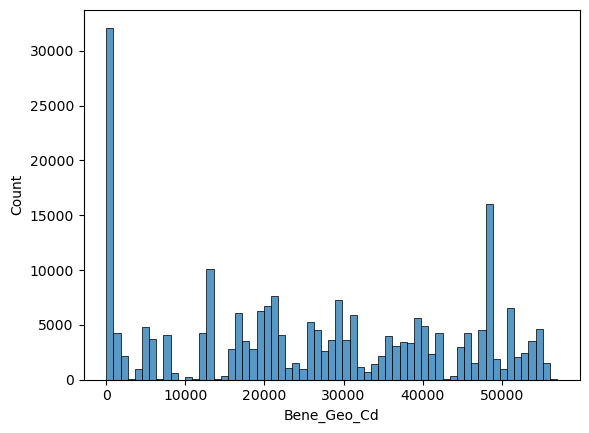

In [54]:
sns.histplot(data=sccdf, x=sccdf['Bene_Geo_Cd'])

<Axes: xlabel='ER_Visits_Per_1000_Benes', ylabel='Count'>

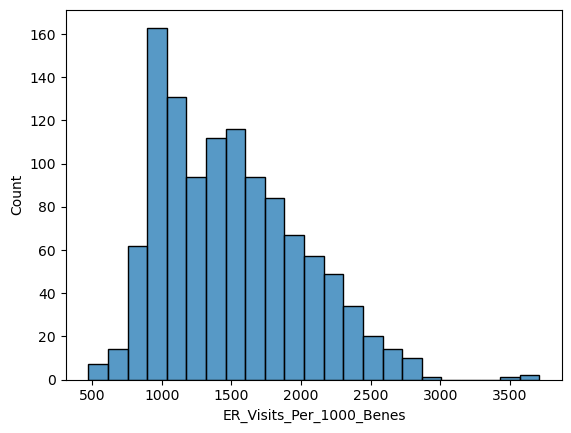

In [57]:
sns.histplot(data=sccdf, x=sccdf['ER_Visits_Per_1000_Benes'])

> besides missing NaN values which cannot really be filled in (mostly numeric and spread out among all the data), the data already appears to be clean. All categorical values have associated values and the dictionary explains them. The numeric variables are all filled in and have no negatives, commas, etc. except for the NaN values. I thought it was interesting to look at the Geographic Codes that were used to see which were most frequent. The highest spike by county (states are 0-50) in the high 40,000s is likely a county in Texas (by population, that would be Harris County which includes Houston).

4. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?

<Axes: xlabel='ER_Visits_Per_1000_Benes'>

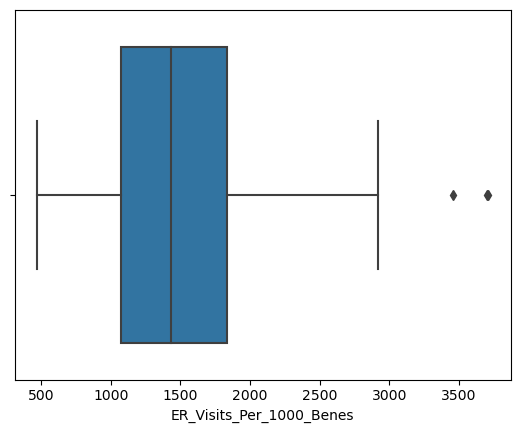

In [66]:
sns.boxplot(data=sccdf, x=sccdf['ER_Visits_Per_1000_Benes'])

<Axes: xlabel='Prvlnc'>

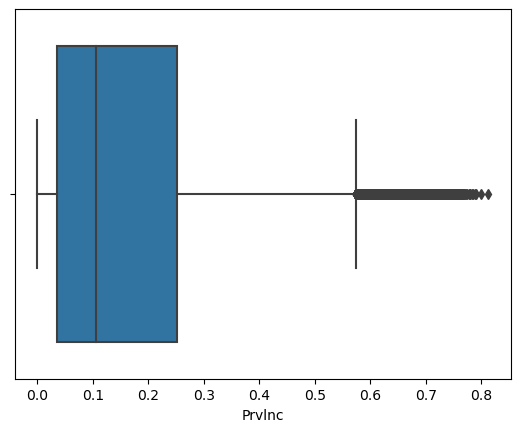

In [96]:
sns.boxplot(data=sccdf, x=sccdf['Prvlnc'])

> all categorical variables are there to break up the numeric variables and every permutation exists. For example, every state has every age level, chronic condition for each age level, etc. Looking athe the numeric variables though, the ER visits per every 1000 beneficiaries has a couple outliers near 3500 which is very different from the normal 500-2500 thats much more common. The same exists for Prevelence (percentage), where most areas are between 5-25% beneficiaries with a specific condition, but some areas have 60-80% of beneficiaries with the same condition.

5. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 

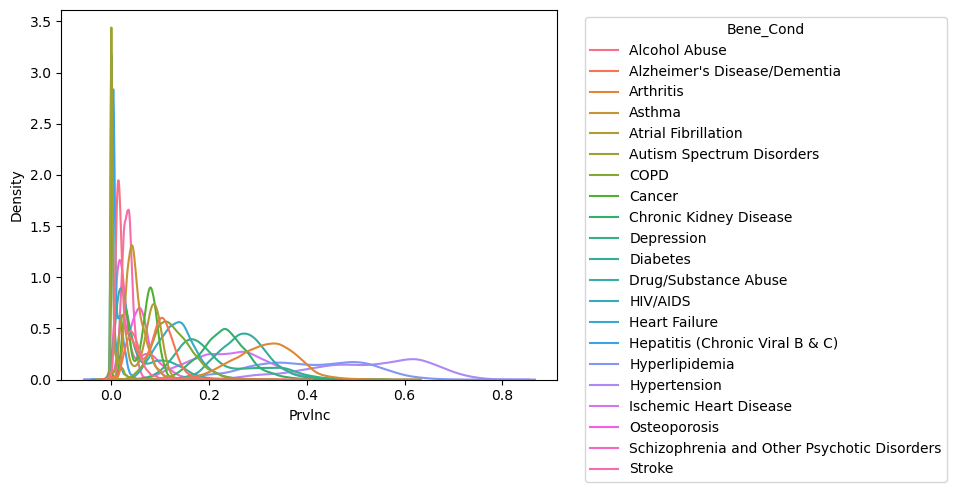

In [83]:
this_plot = sns.kdeplot(data=sccdf,x=sccdf['Prvlnc'],hue=sccdf['Bene_Cond'])
sns.move_legend(this_plot, "upper right", bbox_to_anchor=(1.8, 1)) # Moves the Legend

> Most of the chronic conditions have a low prevalence (# afflicted / # of beneficiaries in a population). However, some chronic conditions such as Arthritis and Hyperlipidemia are very prevalent. The most prevalent is Hypertension at about 60%. This shows that bone/muscle issues cause the most common chronic diseases.

6. Create a scatter plot, and describe the relationship you see.

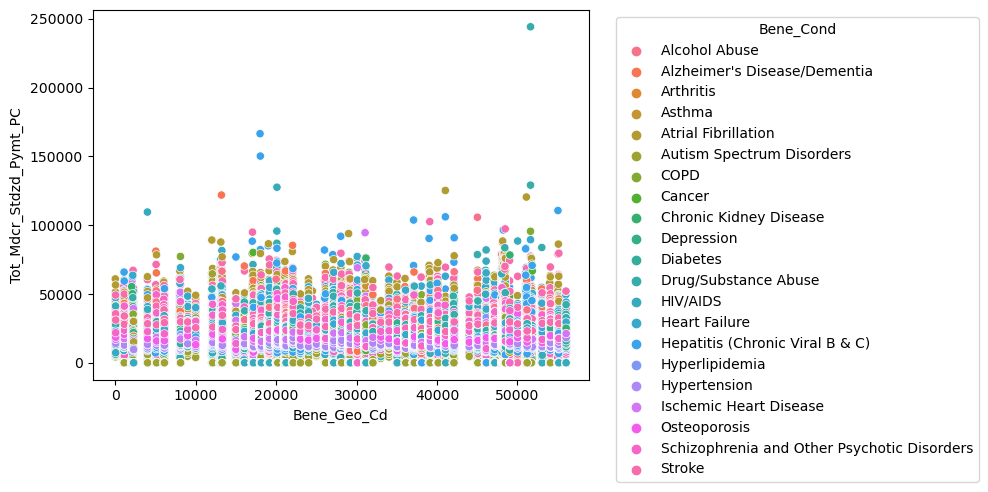

In [102]:
this_plot = sns.scatterplot(data=sccdf,x=sccdf['Bene_Geo_Cd'],y=sccdf['Tot_Mdcr_Stdzd_Pymt_PC'],hue='Bene_Cond')
sns.move_legend(this_plot, "upper right", bbox_to_anchor=(1.8,1)) # Moves the legend

> The scatterplot shows the total standardized per capita spending across the US by county. The variation in the payment is loosely linked to chronic disease type (the colors). For example, hypertension costs less than heart failure or hepatitis in general (based on the visible dots at least, which may be a short coming of drawing such a conclusion from a scatterplot). Additionally, besides some very high outliers, the per capita spending does not change much county by county, which shows a consistency across the geographical US of a consistent pricing/spending model.

7. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [109]:
sccdf['Hosp_Readmsn_Rate'].describe()

count    1110.000000
mean        0.218943
std         0.039100
min         0.000000
25%         0.192325
50%         0.216200
75%         0.240225
max         0.367800
Name: Hosp_Readmsn_Rate, dtype: float64

> The readmission rate (within 30 days of a previous discharge for any reason) is never higher than 37% in any geographical area where data was gathered for this set (county, state). However, on average, 1 in every 5 discharges with one of the chronic conditions studied will be readmitted in the next 30 days. No set conclusion can be drawn, but this may show poor treatment, complexity/serverity of the condition, or poor care when not admitted.